# Example Items
These are sample items we are going to handle in this exercise.

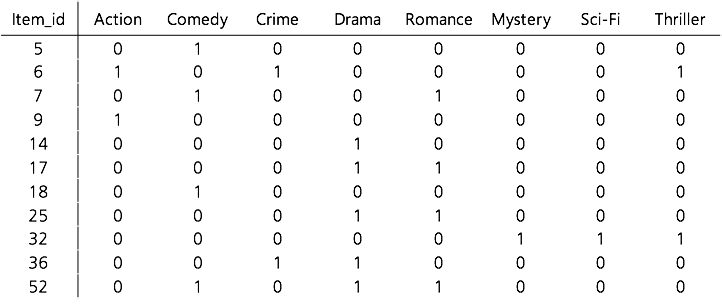

Import necessary required packages for the exercise.

In [1]:
import math
import numpy as np

Set numpy priting options for pretty array priting.

In [2]:
np.set_printoptions(precision=2, linewidth=120)

# Item Similarity

### Weight Matrix
Create a binary valued matrix that holds the item's genre accurance in each cell.

In [3]:
matrix = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0]
])
print("Items :",matrix.shape[0])
print("Genres:",matrix.shape[1])

Items : 11
Genres: 8


Create a matrix that will hold weights for all items.

We will compute weights by TF-IDF scheme.
* We will use 1 for TF of each genre in items.
* We will compute IDFs for genres and assign them in column-wise manner.

In [4]:
totalItems = matrix.shape[0]
totalGenres = matrix.shape[1]

weights = np.zeros(matrix.shape)

for i in range(0, totalGenres):
    col = matrix[:,i]
    idf = math.log10(totalItems/col.sum())
    for j in range(0, totalItems):
        weights[j, i] = matrix[j, i] * idf

See the weights.

In [5]:
weights

array([[ 0.  ,  0.44,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.74,  0.  ,  0.74,  0.  ,  0.  ,  0.  ,  0.  ,  0.74],
       [ 0.  ,  0.44,  0.  ,  0.  ,  0.44,  0.  ,  0.  ,  0.  ],
       [ 0.74,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.34,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.34,  0.44,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.44,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.34,  0.44,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.04,  1.04,  0.74],
       [ 0.  ,  0.  ,  0.74,  0.34,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.44,  0.  ,  0.34,  0.44,  0.  ,  0.  ,  0.  ]])

### $l_2$-norm
Let's define norm2 function for computing l2-norm of a vector, which is represented as an array in np.

$$norm2(v)=||v||_2=\sqrt{\sum_{\forall i}v_i^2}$$

In [6]:
def norm2(arr):
    sum = 0.0
    for i in range(0, len(arr)):
        sum += arr[i] * arr[i]
    return math.sqrt(sum)

In [7]:
print(weights[0],"=>",norm2(weights[0]))
print(weights[1],"=>",norm2(weights[1]))

[ 0.    0.44  0.    0.    0.    0.    0.    0.  ] => 0.43933269383026263
[ 0.74  0.    0.74  0.    0.    0.    0.    0.74] => 1.282345794232371


### Inner Product

Let's define dot function for computin inner product between two vectors.

$$dot(u, v)=u\cdot v=\sum_{\forall i}{u_i \times v_i}$$

In [8]:
def dot(arr1, arr2):
    sum = 0.0
    for i in range(0, len(arr1)):
        sum += arr1[i] * arr2[i]
    return sum

In [9]:
print(dot(weights[0], weights[1]))
print(dot(weights[0], weights[2]))
print(dot(weights[0], weights[3]))

0.0
0.193013215868
0.0


### Cosine Similarity

Let's define cosine similarity function for two vectors.

$$ cosine(u, v)=\frac{dot(u,v)}{norm2(u)norm2(v)}=\frac{u\cdot v}{||u||_2||v||_2} $$

In [10]:
def cosine(arr1, arr2):
    return dot(arr1, arr2)/(norm2(arr1)*norm2(arr2))

In [11]:
print(cosine(weights[0], weights[1]))
print(cosine(weights[0], weights[2]))
print(cosine(weights[0], weights[3]))

0.0
0.707106781187
0.0


# Easy Computation using `numpy`
Let's do this in a more convenient way with *numpy's linalg*

In [12]:
from numpy import linalg as LA

Compute norms and save it to **`norms`**.

In [13]:
norms = LA.norm(weights, ord=2, axis=1)
norms

array([ 0.44,  1.28,  0.62,  0.74,  0.34,  0.56,  0.44,  0.56,  1.65,  0.82,  0.71])

Compute inner products among all items. 

In [14]:
dots = np.matmul(weights, weights.T)
dots

array([[ 0.19,  0.  ,  0.19,  0.  ,  0.  ,  0.  ,  0.19,  0.  ,  0.  ,  0.  ,  0.19],
       [ 0.  ,  1.64,  0.  ,  0.55,  0.  ,  0.  ,  0.  ,  0.  ,  0.55,  0.55,  0.  ],
       [ 0.19,  0.  ,  0.39,  0.  ,  0.  ,  0.19,  0.19,  0.19,  0.  ,  0.  ,  0.39],
       [ 0.  ,  0.55,  0.  ,  0.55,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.12,  0.12,  0.  ,  0.12,  0.  ,  0.12,  0.12],
       [ 0.  ,  0.  ,  0.19,  0.  ,  0.12,  0.31,  0.  ,  0.31,  0.  ,  0.12,  0.31],
       [ 0.19,  0.  ,  0.19,  0.  ,  0.  ,  0.  ,  0.19,  0.  ,  0.  ,  0.  ,  0.19],
       [ 0.  ,  0.  ,  0.19,  0.  ,  0.12,  0.31,  0.  ,  0.31,  0.  ,  0.12,  0.31],
       [ 0.  ,  0.55,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.72,  0.  ,  0.  ],
       [ 0.  ,  0.55,  0.  ,  0.  ,  0.12,  0.12,  0.  ,  0.12,  0.  ,  0.67,  0.12],
       [ 0.19,  0.  ,  0.39,  0.  ,  0.12,  0.31,  0.19,  0.31,  0.  ,  0.12,  0.5 ]])

In [15]:
sims = np.divide(np.divide(dots, norms).T, norms)
sims

array([[ 1.  ,  0.  ,  0.71,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.62],
       [ 0.  ,  1.  ,  0.  ,  0.58,  0.  ,  0.  ,  0.  ,  0.  ,  0.26,  0.52,  0.  ],
       [ 0.71,  0.  ,  1.  ,  0.  ,  0.  ,  0.56,  0.71,  0.56,  0.  ,  0.  ,  0.88],
       [ 0.  ,  0.58,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.61,  0.  ,  0.61,  0.  ,  0.42,  0.48],
       [ 0.  ,  0.  ,  0.56,  0.  ,  0.61,  1.  ,  0.  ,  1.  ,  0.  ,  0.26,  0.79],
       [ 1.  ,  0.  ,  0.71,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.62],
       [ 0.  ,  0.  ,  0.56,  0.  ,  0.61,  1.  ,  0.  ,  1.  ,  0.  ,  0.26,  0.79],
       [ 0.  ,  0.26,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.52,  0.  ,  0.  ,  0.42,  0.26,  0.  ,  0.26,  0.  ,  1.  ,  0.2 ],
       [ 0.62,  0.  ,  0.88,  0.  ,  0.48,  0.79,  0.62,  0.79,  0.  ,  0.2 ,  1.  ]])

In [16]:
sims[0]

array([ 1.  ,  0.  ,  0.71,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.62])